# 20. JSONデータの読み込み

In [2]:
import json

In [3]:
with open('./data/jawiki-country.json', encoding = 'UTF-8') as f:
    for line in f:
        data = json.loads(line)
        if data['title'] == 'イギリス':
            england_data = data['text']
            break

In [4]:
for data in england_data.split('\n')[:10]:
    print(data)

{{redirect|UK}}
{{redirect|英国|春秋時代の諸侯国|英 (春秋)}}
{{Otheruses|ヨーロッパの国|長崎県・熊本県の郷土料理|いぎりす}}
{{基礎情報 国
|略名  =イギリス
|日本語国名 = グレートブリテン及び北アイルランド連合王国
|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）


# 21. カテゴリ名を含む行を抽出

In [5]:
import re

In [6]:
re.findall(r'\[\[Category.*\]\]', england_data)

['[[Category:イギリス|*]]',
 '[[Category:イギリス連邦加盟国]]',
 '[[Category:英連邦王国|*]]',
 '[[Category:G8加盟国]]',
 '[[Category:欧州連合加盟国|元]]',
 '[[Category:海洋国家]]',
 '[[Category:現存する君主国]]',
 '[[Category:島国]]',
 '[[Category:1801年に成立した国家・領域]]']

# 22. カテゴリ名の抽出

In [7]:
re.findall(r'\[\[Category:(.*)?\]\]', england_data)

['イギリス|*',
 'イギリス連邦加盟国',
 '英連邦王国|*',
 'G8加盟国',
 '欧州連合加盟国|元',
 '海洋国家',
 '現存する君主国',
 '島国',
 '1801年に成立した国家・領域']

# 23. セクション構造

In [8]:
res = re.findall(r'==.*==', england_data)
for section in res:
    level = section.count('=') // 2 - 1
    section = section.replace('=', '').strip()
    print(f'{section} : {level}') 

国名 : 1
歴史 : 1
地理 : 1
主要都市 : 2
気候 : 2
政治 : 1
元首 : 2
法 : 2
内政 : 2
地方行政区分 : 2
外交・軍事 : 2
経済 : 1
鉱業 : 2
農業 : 2
貿易 : 2
不動産 : 2
エネルギー政策 : 2
通貨 : 2
企業 : 2
通信 : 3
交通 : 1
道路 : 2
鉄道 : 2
海運 : 2
航空 : 2
科学技術 : 1
国民 : 1
言語 : 2
宗教 : 2
婚姻 : 2
移住 : 2
教育 : 2
医療 : 2
文化 : 1
食文化 : 2
文学 : 2
哲学 : 2
音楽 : 2
ポピュラー音楽 : 3
映画 : 2
コメディ : 2
国花 : 2
世界遺産 : 2
祝祭日 : 2
スポーツ : 2
サッカー : 3
クリケット : 3
競馬 : 3
モータースポーツ : 3
野球 : 3
カーリング : 3
自転車競技 : 3
脚注 : 1
関連項目 : 1
外部リンク : 1


# 24. ファイル参照の抽出

In [9]:
re.findall(r'ファイル:(.*?)\|', england_data)

['Royal Coat of Arms of the United Kingdom.svg',
 'Descriptio Prime Tabulae Europae.jpg',
 "Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg",
 'London.bankofengland.arp.jpg',
 'Battle of Waterloo 1815.PNG',
 'Uk topo en.jpg',
 'BenNevis2005.jpg',
 'Population density UK 2011 census.png',
 '2019 Greenwich Peninsula & Canary Wharf.jpg',
 'Birmingham Skyline from Edgbaston Cricket Ground crop.jpg',
 'Leeds CBD at night.jpg',
 'Glasgow and the Clyde from the air (geograph 4665720).jpg',
 'Palace of Westminster, London - Feb 2007.jpg',
 'Scotland Parliament Holyrood.jpg',
 'Donald Trump and Theresa May (33998675310) (cropped).jpg',
 'Soldiers Trooping the Colour, 16th June 2007.jpg',
 'City of London skyline from London City Hall - Oct 2008.jpg',
 'Oil platform in the North SeaPros.jpg',
 'Eurostar at St Pancras Jan 2008.jpg',
 'Heathrow Terminal 5C Iwelumo-1.jpg',
 'Airbus A380-841 G-XLEB British Airways (10424102995).jpg',
 'UKpop.svg',
 'Anglospeak.svg',
 "Royal Aberdeen Children's Hospita

# 25. テンプレートの抽出

In [306]:
template = re.search(r'{{基礎情報 国(.*?)}}\n\n', england_data, flags = re.DOTALL)
template_list = re.split(r'\n\|', template.group(1))
field_dict = dict()
for line in template_list:
    if line == '': continue
    splited_line = line.split('=', 1)
    field_dict[splited_line[0].strip()] = splited_line[1].strip()

In [329]:
for key, val in field_dict.items():
    print(f'key : {key}\tval : {val}')

key : 略名	val : イギリス
key : 日本語国名	val : グレートブリテン及び北アイルランド連合王国
key : 公式国名	val : {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
key : 国旗画像	val : Flag of the United Kingdom.svg
key : 国章画像	val : [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
key : 国章リンク	val : （[[イギリスの国章|国章]]）
key : 標語	val : {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
key : 国歌

# 26. 強調マークアップの除去

In [331]:
for (key, val) in field_dict.items():
    val = re.sub('(?P<single>\'{2,5})(.*?)(?P=single)', r'\2', val)
    field_dict[key] = val

In [332]:
for (key, val) in field_dict.items():
    print(f'key : {key}\tval : {val}')

key : 略名	val : イギリス
key : 日本語国名	val : グレートブリテン及び北アイルランド連合王国
key : 公式国名	val : {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
key : 国旗画像	val : Flag of the United Kingdom.svg
key : 国章画像	val : [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
key : 国章リンク	val : （[[イギリスの国章|国章]]）
key : 標語	val : {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
key : 国歌

# 27. 内部リンクの除去

In [333]:
replaced = field_dict.copy()
for (key, val) in replaced.items():
    val = re.sub(r'\[\[(?!ファイル:|File:|Category:)(?:[^\|{}\[\]]*?\|)*(.*?)\]\]', r'\1', val)
    replaced[key] = val

In [334]:
for (key, val) in replaced.items():
    print(f'{key} : {val}')

略名 : イギリス
日本語国名 : グレートブリテン及び北アイルランド連合王国
公式国名 : {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（スコットランド・ゲール語）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（ウェールズ語）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（アイルランド語）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（コーンウォール語）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（スコットランド語）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
国旗画像 : Flag of the United Kingdom.svg
国章画像 : [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク : （国章）
標語 : {{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）
国歌 : {{lang|en|God Save the Queen}}{{en icon}}<br />神よ女王を護り賜え<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
地図画像

# 28. MediaWikiマークアップの除去

In [335]:
def delete_meta(field):
    ret = field.copy()
    for (key, val) in ret.items():
        val = re.sub(r'<ref.*?>.*?</ref>','', val, flags = re.DOTALL)
        val = re.sub(r'<.*?>','',val, flags = re.DOTALL)
        ret[key] = val
    return ret

def delete_file_and_category(field):
    ret = field.copy()
    for (key, val) in ret.items():
        val = re.sub(r'\[\[(?:ファイル:|File:|Category:)(?:[^\|{}\[\]]*?\|)*(.*?)\]\]', r'\1', val)
        ret[key] = val
    return ret

def delete_bullets(field):
    ret = field.copy()
    for (key, val) in ret.items():
        val = re.sub(r'#REDIRECT', '', val)
        val = re.sub(r'^[\#\*\;\:]+|----', '', val, flags = re.MULTILINE)
        ret[key] = val
    return ret
    
def delete_link(field):
    ret = field.copy()
    for (key, val) in ret.items():
        val = re.sub(r'\[\[(?!ファイル:|File:|Category:)(?:[^\|{}\[\]]*?\|)*(.*?)\]\]', r'\1', val)
        val = re.sub(r'\{\{仮リンク\|([^\|]*)(?:\|[^\|]*?)*?\}\}', r'\1', val)
        val = re.sub(r'\[https?://[\w/:%#\$&\?\(\)~\.=\+\-]+ *?([^\ ]*?)\]', r'\1', val)
        val = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-]+', '', val)
        ret[key] = val
    return ret

def delete_lang(field):
    ret = field.copy()
    for (key, val) in ret.items():
        val = re.sub(r'\{\{lang(?:[^\|{}\[\]]*?\|)*(.*?)\}\}', r'\1', val)
        ret[key] = val
    return ret

def delete_template(field):
    ret = field.copy()
    for (key, val) in ret.items():
        val = re.sub(r'\{\{.*?\}\}', '', val)
        ret[key] = val
    return ret

In [336]:
func_list = [delete_link, delete_file_and_category, delete_lang, delete_meta, delete_bullets, delete_template]
cpy_dict = field_dict.copy()
for func in func_list:
    cpy_dict = func(cpy_dict)
    
for (key, val) in cpy_dict.items():
    print(f'{key} : {val}')

略名 : イギリス
日本語国名 : グレートブリテン及び北アイルランド連合王国
公式国名 : United Kingdom of Great Britain and Northern Ireland
国旗画像 : Flag of the United Kingdom.svg
国章画像 : イギリスの国章
国章リンク : （国章）
標語 : Dieu et mon droit（フランス語:神と我が権利）
国歌 : God Save the Queen神よ女王を護り賜え
地図画像 : Europe-UK.svg
位置画像 : United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 : 英語
首都 : ロンドン（事実上）
最大都市 : ロンドン
元首等肩書 : 女王
元首等氏名 : エリザベス2世
首相等肩書 : 首相
首相等氏名 : ボリス・ジョンソン
他元首等肩書1 : 貴族院議長
他元首等氏名1 : ノーマン・ファウラー
他元首等肩書2 : 庶民院議長
他元首等氏名2 : リンゼイ・ホイル
他元首等肩書3 : 最高裁判所長官
他元首等氏名3 : ブレンダ・ヘイル
面積順位 : 76
面積大きさ : 1 E11
面積値 : 244,820
水面積率 : 1.3%
人口統計年 : 2018
人口順位 : 22
人口大きさ : 1 E7
人口値 : 6643万5600
人口密度値 : 271
GDP統計年元 : 2012
GDP値元 : 1兆5478億
GDP統計年MER : 2012
GDP順位MER : 6
GDP値MER : 2兆4337億
GDP統計年 : 2012
GDP順位 : 6
GDP値 : 2兆3162億
GDP/人 : 36,727
建国形態 : 建国
確立形態1 : イングランド王国／スコットランド王国（両国とも1707年合同法まで）
確立年月日1 : 927年／843年
確立形態2 : グレートブリテン王国成立（1707年合同法）
確立年月日2 : 1707年5月1日
確立形態3 : グレートブリテン及びアイルランド連合王国成立（1800年合同法）
確立年月日3 : 1801年1月1日
確立形態4 : 現在の国号「グレートブリテン及び北アイルラ

# 29. 国旗画像のURLを取得する

In [276]:
import requests
import IPython

In [277]:
S = requests.Session()
URL = "https://www.mediawiki.org/w/api.php"

In [278]:
PARAMS = {
    "action": "query",
    "format": "json",
    "prop": "imageinfo",
    "titles": "File:" + field_dict["国旗画像"],
    "iiprop": "url"
}

R = S.get(url=URL, params=PARAMS)
data = R.json()
im_url = data["query"]["pages"]["-1"]["imageinfo"][0]["url"]

In [279]:
print(im_url)

https://upload.wikimedia.org/wikipedia/commons/a/ae/Flag_of_the_United_Kingdom.svg


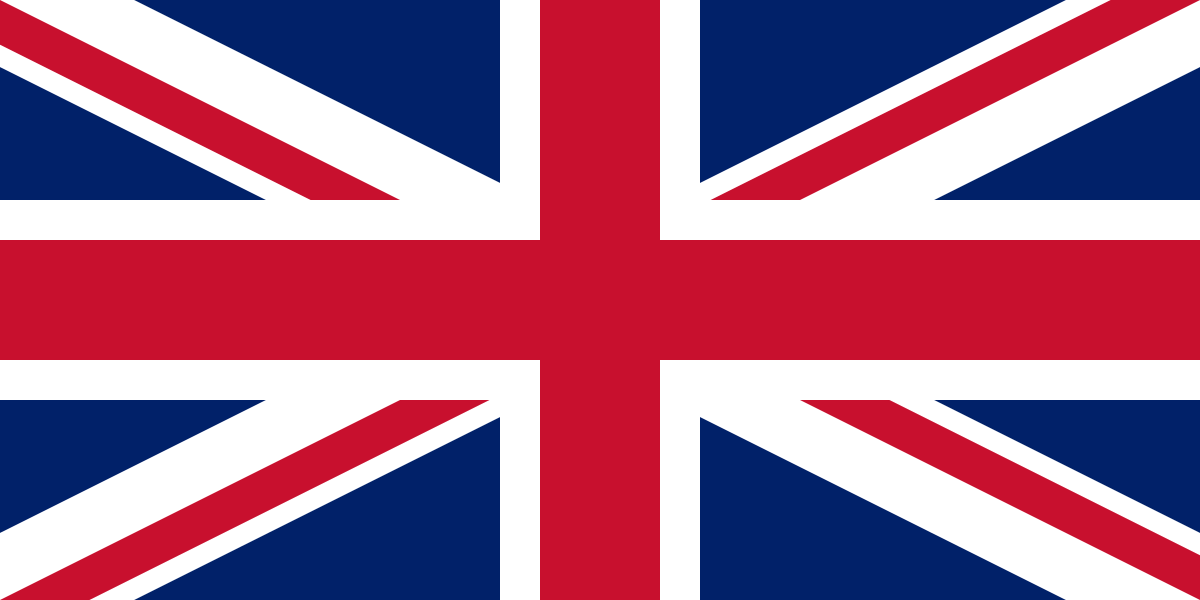

In [280]:
IPython.display.SVG(url = im_url)